             Equipo  Gol
0          Bélgica    13
1          Francia    12
2            Rusia    10
3       Inglaterra     6
4           Brasil     6
5          Uruguay     6
6          Croacia     5
7         Portugal     4
8    Corea del Sur     3
9          Nigeria     3
10          España     3
11           Japón     2
12        Colombia     2
13          Suecia     2
14        Alemania     2
15           Suiza     2
16  Arabia Saudita     2
17         Polonia     1
18          Panamá     1
19           Túnez     1
20          Serbia     1
21        Islandia     1
22       Argentina     1
23       Dinamarca     1
24            Irán     1
25         Senegal     0
26          México     0
27      Costa Rica     0
28       Australia     0
29            Perú     0
30       Marruecos     0
31          Egipto     0


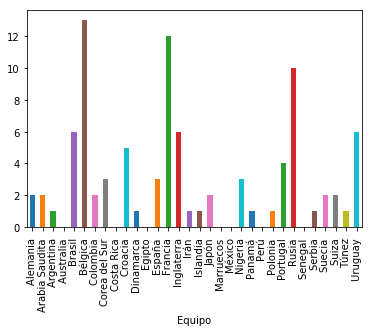

In [13]:
import requests

url = 'https://es.wikipedia.org/wiki/Copa_Mundial_de_F%C3%BAtbol_de_2018'
html = requests.get(url).content

from bs4 import BeautifulSoup
rows = []
localTeam = []

soup = BeautifulSoup(html, "lxml")
table = soup.find_all('table',{'class':'collapsible autocollapse vevent plainlist'})
for i in table:
    rows.append(i.find_all('tr'))

rows = [row[0].text.strip().split("\n") for row in rows]
for i in rows:
    localTeam.append([i[2],i[4].split(':')[0]])

result = {}
for card,value in localTeam:
        total = result.get(card,0) + int(value)
        result[card] = total
        
sorted_by_value = sorted(result.items(), key=lambda kv: kv[1])
sorted_by_value.reverse()
import pandas as pd
colnames = ['Equipo', 'Gol']
df = pd.DataFrame(sorted_by_value, columns=colnames)
print(df)
df.groupby("Equipo")['Gol'].mean().plot(kind='bar')


In [38]:
sum = 0

for num in localTeam[56:]:
    sum += int(num[1])
sum = sum /len(localTeam[56:])
str(sum) + ' average local goals for matches between quarters and final.'

'1.5 average local goals for matches between quarters and final.'

                 Player  Gol
0         Kylian MBAPPE    4
1         Romelu LUKAKU    4
2       Denis CHERYSHEV    4
3        Edinson CAVANI    3
4     CRISTIANO RONALDO    3
5       Mario MANDZUKIC    2
6            Iago ASPAS    2
7           John STONES    2
8          SON Heungmin    2
9           Eden HAZARD    2
10           Ahmed MUSA    2
11               NEYMAR    2
12          Luis SUAREZ    2
13    PHILIPPE COUTINHO    2
14           Paul POGBA    2
15         Artem DZYUBA    2
16       Thomas MEUNIER    1
17         Ivan PERISIC    1
18        Samuel UMTITI    1
19      MARIO FERNANDES    1
20       RENATO AUGUSTO    1
21           Yerry MINA    1
22        Emil FORSBERG    1
23         Nacer CHADLI    1
24    Marouane FELLAINI    1
25       Jan VERTONGHEN    1
26      ROBERTO FIRMINO    1
27      Benjamin PAVARD    1
28  Jose Luis RODRIGUEZ    1
29          Josip DRMIC    1
30      Blerim DZEMAILI    1
31        KIM Younggwon    1
32                 ISCO    1
33      SALEM 

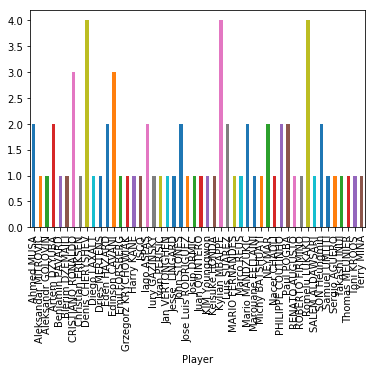

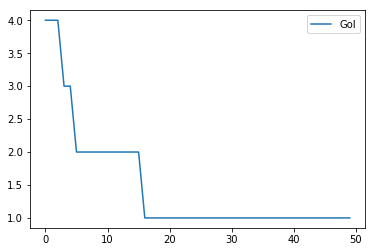

In [3]:
import urllib.request, json 
with urllib.request.urlopen("http://worldcup.sfg.io/matches") as url:
    data = json.loads(url.read().decode())

arrActions = []
for game in data:
    for action in game['home_team_events']:
        if action['type_of_event']=='goal':
            arrActions.append(action['player'])

import collections
counter=collections.Counter(arrActions)
sorted_by_value = sorted(counter.items(), key=lambda kv: kv[1])
sorted_by_value.reverse()

import pandas as pd
colnames = ['Player', 'Gol']
df = pd.DataFrame(sorted_by_value, columns=colnames)
print(df)
df.groupby("Player")['Gol'].mean().plot(kind='bar')
import matplotlib.pyplot as plt
df.plot()
plt.show()